# TASK 1 : Import Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, BatchNormalization, Dropout, Flatten, Input
from tensorflow.keras.models import Sequential, Model
import os
import matplotlib.pyplot as plt

# TASK 2 : Clone & Explore dataset

In [ ]:
#clone the dataset from the github repository
# ! git clone https://github.com/education454/datasets.git

In [ ]:
#set the path to the main dir
main_dir = 'data'
#set the path to the train dir
train_dir = 'train'
#set the path to the test dir
test_dir = 'test_dir'

#directory with the training covid images
train_covid_dir = os.path.join(train_dir, 'COVID19')
# Directory with the training normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')
# Directory with the testing COVID-19 images
test_covid_dir = os.path.join(test_dir, 'COVID19')
# Directory with the testing normal images
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [ ]:
import os
import cv2

def load_dataset(data_dir, img_height=224, img_width=224):
    X = []
    Y = []
    
    # Get the list of classes from the directory names
    classes = os.listdir(data_dir)
    num_classes = len(classes)
    
    for class_index, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_height, img_width))  # Resize image
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            X.append(img)
            Y.append(class_index)
    
    X = np.array(X)
    Y = np.array(Y)
    
    return X, Y

# Set the paths to the main dir
main_dir = 'data'
# Set the path to the train dir
train_dir = os.path.join(main_dir, 'train')
# Set the path to the test dir
test_dir = os.path.join(main_dir, 'test')

# Load training data
train_X, train_Y = load_dataset(train_dir)
# Load testing data
test_X, test_Y = load_dataset(test_dir)


In [ ]:
#print the total no of images present in each dir
print("Train X shape:", train_X.shape)
print("Train Y shape:", train_Y.shape)
print("Test X shape:", test_X.shape)
print("Test Y shape:", test_Y.shape)

# TASK 3 : Data Visualization

In [ ]:
# Set the paths to the main dir
main_dir = 'data'
# Set the path to the train dir
train_dir = os.path.join(main_dir, 'train')

# Function to get filenames from directory
def get_filenames(directory):
    filenames = []
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png"):  # Adjust based on your image extensions
                filenames.append(os.path.join(root, file))
            count += 1
            if count >= 128:
                return filenames

# Get filenames for COVID-19 and Normal images
covid_filenames = get_filenames(os.path.join(train_dir, 'COVID19'))
normal_filenames = get_filenames(os.path.join(train_dir, 'NORMAL'))

# Merge lists and shuffle
all_filenames = covid_filenames[:8] + normal_filenames[:8]
np.random.shuffle(all_filenames)

# Plotting the grid of images
num_images = 32
rows = 4
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    img = plt.imread(all_filenames[i])
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()


# TASK 4 : Data Preprocessing & Augmentation

In [ ]:
# generate training,testing and validation batches
# Splitting training data into training and validation sets
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=42)

# Define image data generators for augmentation (if needed)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Define batch sizes
batch_size = 32

# Flow from directory for training, validation, and testing data
train_generator = train_datagen.flow(train_X, train_Y, batch_size=batch_size, shuffle=True)
val_generator = test_datagen.flow(val_X, val_Y, batch_size=batch_size, shuffle=False)
test_generator = test_datagen.flow(test_X, test_Y, batch_size=batch_size, shuffle=False)

In [ ]:
#get the class indices

In [ ]:
#get the image shape

# TASK 5 : Build Convolutional Neural Network Model

In [ ]:
model = Sequential([
    # Add the first convolutional layer
    Conv2D(64, kernel_size=(4, 4), padding='same', activation='relu', input_shape=(224, 224, 3)),
    # Add a pooling layer
    MaxPooling2D(pool_size=(2, 2)),
    # Add a dropout layer
    Dropout(0.2),
    
    # Add the second convolutional layer
    Conv2D(128, kernel_size=(4, 4), padding='same', activation='relu'),
    # Add a pooling layer
    MaxPooling2D(pool_size=(2, 2)),
    # Add a dropout layer
    Dropout(0.2),
    
    # Flatten layer
    Flatten(),
    # Add a dense layer
    Dense(64, activation='relu'),
    # Output layer
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

model.summary()


# TASK 6 : Compile & Train the Model

In [ ]:
#compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy for binary classification
              metrics=['accuracy'])

In [ ]:
#train the model
epochs = 10
history = model.fit(train_generator,
                    epochs=epochs,
                    steps_per_epoch=len(train_generator),
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

In [31]:
history_dict = history.history

# TASK 7 : Performance Evaluation

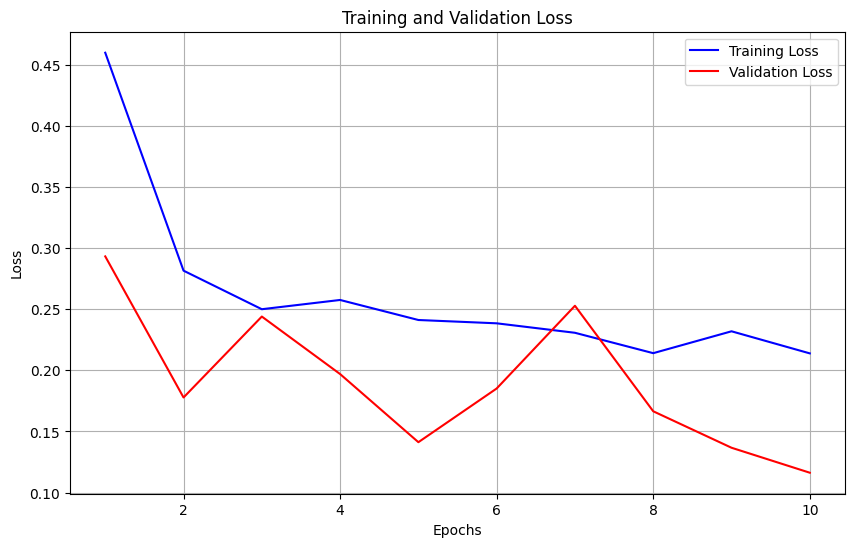

In [32]:
# Extracting training and validation loss
training_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

# Extracting epochs
epochs = range(1, len(training_loss) + 1)

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


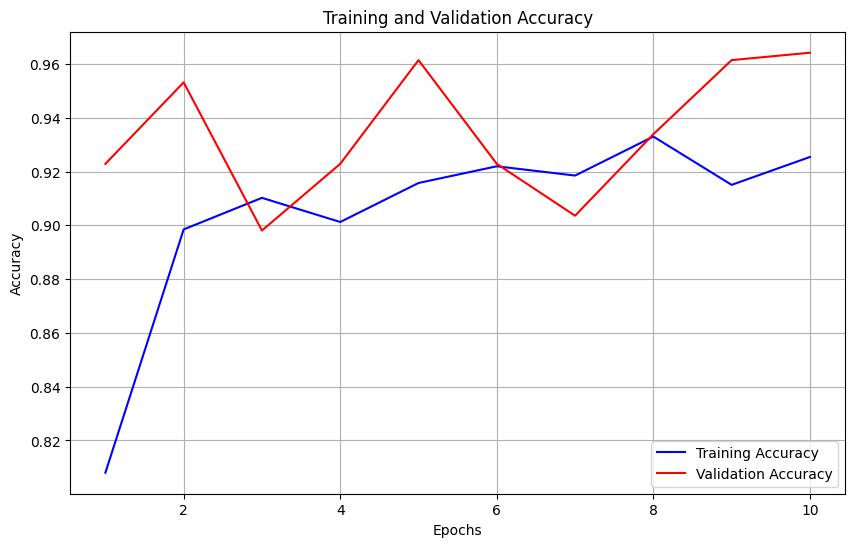

In [33]:
# Extracting training and validation accuracy
training_accuracy = history_dict['accuracy']
validation_accuracy = history_dict['val_accuracy']

# Plotting training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
# get the test acuarcy and loss
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


16/16 [==============================] - 4s 267ms/step - loss: 0.1648 - accuracy: 0.9360
Test Loss: 0.1648
Test Accuracy: 93.60%


# TASK 8 : Prediction On New Data